In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
sigma = 1
alpha_omega = 0.1
f_omega = .7
N_omega = 137

x = np.linspace(-1.01, 1, 201)+1e-8
z = np.linspace(0, 2, 401)
X, Z = np.meshgrid(x, z)

B = (-((1j * sigma + alpha_omega) ** 2) - f_omega**2) ** (1 / 2)
# B = B*np.exp(1j*np.pi)
C = (1 / (N_omega**2) * (1j * sigma + alpha_omega) ** 2 + 1) ** (1 / 2)
B, C = np.complex128(B), np.complex128(C)
A = B / C
chi = np.sign(np.imag(1 / A))

L_1 = chi * (1 / A) * Z + X
L_2 = -chi * (1 / A) * Z + X

mu_1 = np.sign(np.real(L_1))
mu_2 = np.sign(np.real(L_2))

psi_1 = np.zeros_like(Z, dtype=complex)
psi_2 = np.zeros_like(Z, dtype=complex)
psi_3 = np.zeros_like(Z, dtype=complex)
psi_4 = np.zeros_like(Z, dtype=complex)

D = -1 / (B**2 * 4 * np.pi * 1j)

# psi_1 = -D * A * 2 * 1j * np.pi * (np.sign(X) * np.sinh(A * L_1) + np.sign(X) * np.sinh(A * L_2))
# psi_2 = D * A * (np.exp(A * L_1) * expi(-A * L_1) - np.exp(-A * L_1) * expi(A * L_1))
# psi_3 = D * A * (np.exp(-A * L_2) * expi(A * L_2) - np.exp(A * L_2) * expi(-A * L_2))
# psi_4 = D * np.exp(-Z) * 2 * A * np.sign(X) * 1j * np.pi * 2 * np.sinh(A * X)

# psi_1 += (- expi(A*L_1, theta_b=np.pi))

psi_1 += -np.exp(A*L_1)*(-1j*np.pi-expi(-A*L_1))
psi_1 += np.exp(A*X)*(-1j*np.pi - expi(-A*X))*np.exp(-Z)

psi_1 += np.exp(-A*L_1)*(1j*np.pi - expi(A*L_1, theta_b=np.pi))
psi_1 += -np.exp(-A*X)*(1j*np.pi - expi(A*X, theta_b=np.pi))*np.exp(-Z)

psi_1 += -np.exp(A*L_2)*(expi(-A*L_2, theta_b=np.pi)+1j*np.pi)
psi_1 += np.exp(A*X)*(expi(-A*X, theta_b=np.pi)+1j*np.pi)*np.exp(-Z)

psi_1 += np.exp(-A*L_2)*(expi(A*L_2)+1j*np.pi)
psi_1 += -np.exp(-A*X)*(expi(A*X)+1j*np.pi)*np.exp(-Z)

psi_1 = psi_1 * D * A

# psi = psi_1 + psi_2 + psi_3 + psi_4

# k = 12
# psi_1 = k/(k**2+1)*(np.exp(chi*k/A*1j*Z)-np.exp(-Z))*np.exp(1j*k*X)

# psi_1 = -A * np.exp(A * L_1) * mu_1 * 1j * np.pi
# psi_1 += A * np.exp(A * L_1) * expi(-A * L_1)
# psi_1 += A * np.exp(-A * L_1) * mu_1 * 1j * np.pi
# psi_1 += -A * np.exp(-A * L_1) * expi(A * L_1)

# psi_1 += A * np.exp(A * X) * (np.sign(X) * 1j * np.pi) * np.exp(-Z)
# psi_1 += A * np.exp(A * X) * (-expi(-A * X)) * np.exp(-Z)
# psi_1 += -A * np.exp(-A * X) * (np.sign(X) * 1j * np.pi) * np.exp(-Z)
# psi_1 += -A * np.exp(-A * X) * (-expi(A * X)) * np.exp(-Z)

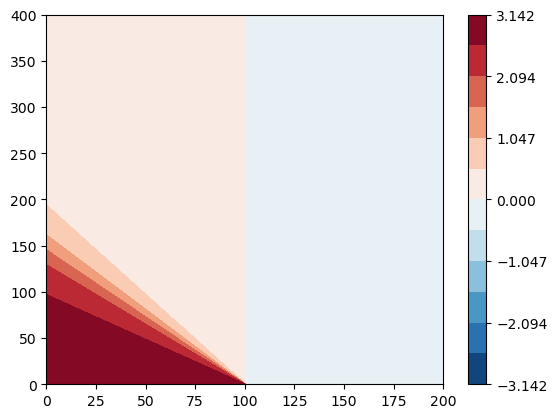

In [52]:
angles = np.atan2(np.imag(A*L_1), np.real(A*L_1))
# angles[angles > np.pi] += 2*np.pi
levels = np.linspace(-np.pi, np.pi, 13)
con = plt.contourf(angles, levels=levels, cmap="RdBu_r")
plt.colorbar(con)

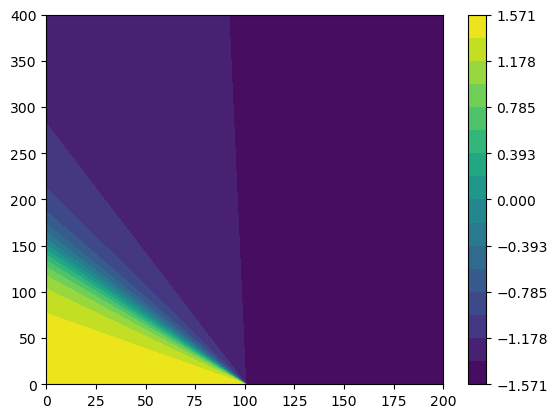

In [53]:
angles = np.atan2(np.imag(-1j*L_1), np.real(-1j*L_1))
# angles[angles < 0] += 2*np.pi
levels = np.linspace(-np.pi/2, np.pi/2, 17)
con = plt.contourf(angles, levels=levels)
plt.colorbar(con)

In [60]:
chi

np.float64(1.0)

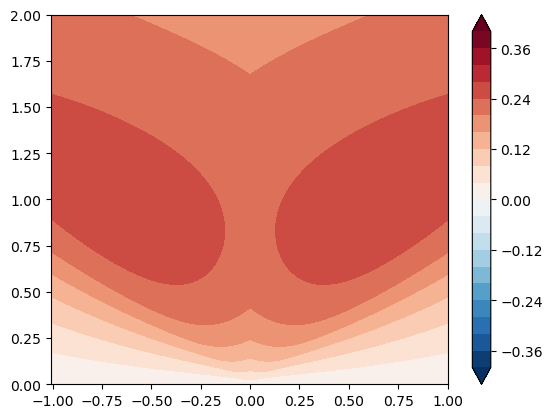

In [61]:
t = 2
levels = np.linspace(-.4, .4, 21)
kwargs = dict(levels=levels, extend='both', cmap="RdBu_r")
con = plt.contourf(X, Z, np.real((psi_1)*np.exp(1j*t)), **kwargs)
plt.colorbar(con, extend='both')

In [62]:
import numpy as np
from scipy.special import expi as sp_expi
import matplotlib.pyplot as plt

def expi(z, theta_b=np.pi/2):
    """
    Calculates the exponential integral Ei(z) with a custom branch cut in direction 
    theta_b.
    """
    principal_value = sp_expi(z)
    z_angle = np.angle(z)
    correction = np.zeros_like(principal_value, dtype=np.complex128)
    if 0 <= theta_b < np.pi:
        mask = (z_angle > theta_b) & (z_angle <= np.pi)
        correction[mask] = -2j * np.pi
    elif -np.pi < theta_b < 0:
        mask = (z_angle > -np.pi) & (z_angle < theta_b)
        correction[mask] = 2j * np.pi
    return principal_value + correction

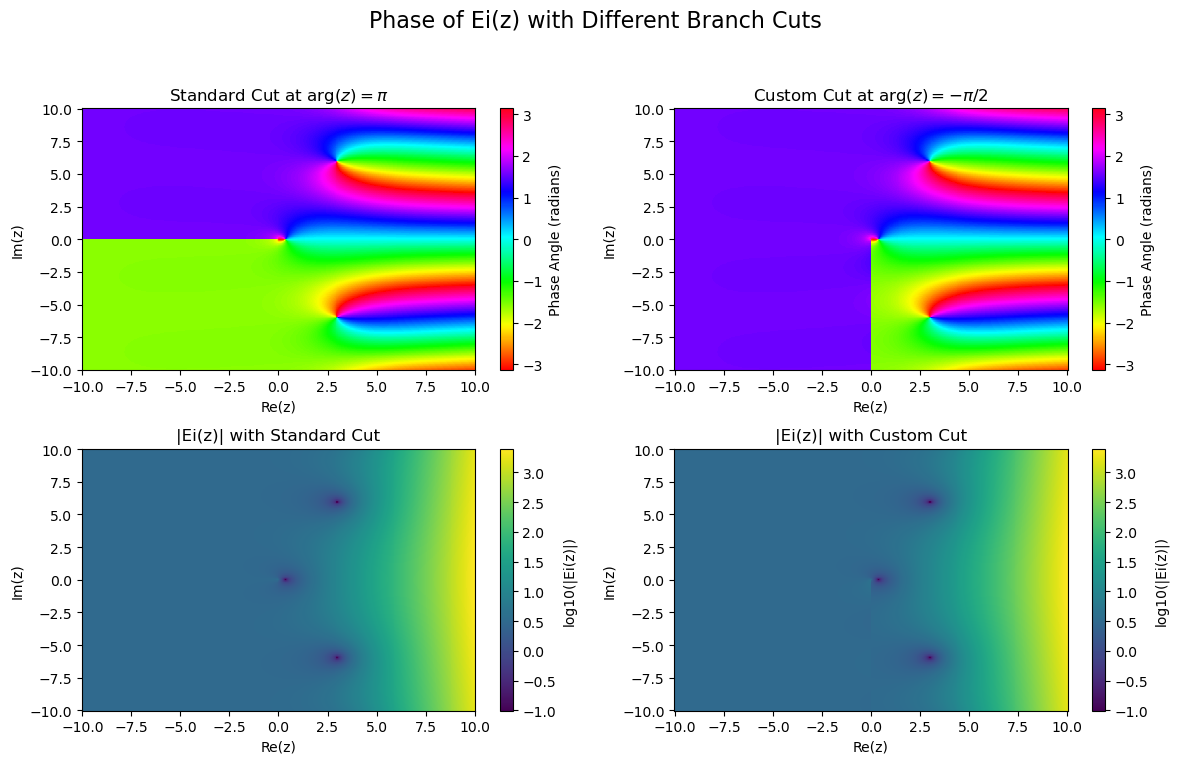

In [63]:
# --- Visualization Example ---

# Create a grid of points in the complex plane
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)

xx, yy = np.meshgrid(x, y)
z_grid = xx + 1j * yy

# --- Calculate Ei for different branch cuts ---
# 1. Standard branch cut along the negative real axis (pi)
ei_standard = expi(z_grid, theta_b=np.pi)

# 2. Custom branch cut along the negative imaginary axis (-pi/2)
ei_custom = expi(z_grid, theta_b=-np.pi / 2)

# --- Plot the phase of the results ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Phase of Ei(z) with Different Branch Cuts", fontsize=16)

ax1, ax2, ax3, ax4 = axes.flatten()

# Plot 1: Standard Cut
im1 = ax1.pcolormesh(xx, yy, np.angle(ei_standard), cmap="hsv")
ax1.set_title(r"Standard Cut at $\arg(z) = \pi$")
ax1.set_xlabel("Re(z)")
ax1.set_ylabel("Im(z)")
fig.colorbar(im1, ax=ax1, label="Phase Angle (radians)")

# Plot 2: Custom Cut
im2 = ax2.pcolormesh(xx, yy, np.angle(ei_custom), cmap="hsv")
ax2.set_title(r"Custom Cut at $\arg(z) = -\pi/2$")
ax2.set_xlabel("Re(z)")
ax2.set_ylabel("Im(z)")
fig.colorbar(im2, ax=ax2, label="Phase Angle (radians)")

# Plot 3: Value of expi
im3 = ax3.pcolormesh(xx, yy, np.log10(np.abs(ei_standard)), cmap="viridis")
ax3.set_title(r"|Ei(z)| with Standard Cut")
ax3.set_xlabel("Re(z)")
ax3.set_ylabel("Im(z)")
fig.colorbar(im3, ax=ax3, label="log10(|Ei(z)|)")

# Plot 4: Value of expi with custom cut
im4 = ax4.pcolormesh(xx, yy, np.log10(np.abs(ei_custom)), cmap="viridis")
ax4.set_title(r"|Ei(z)| with Custom Cut")
ax4.set_xlabel("Re(z)")
ax4.set_ylabel("Im(z)")
fig.colorbar(im4, ax=ax4, label="log10(|Ei(z)|)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

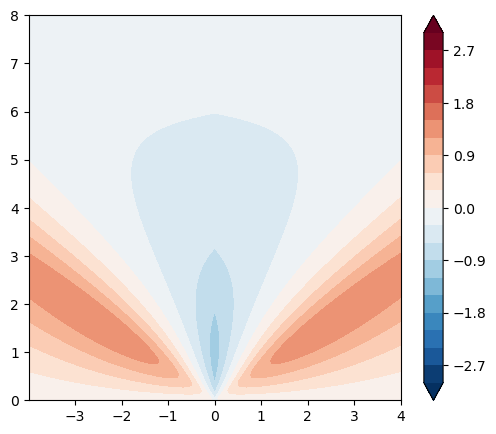

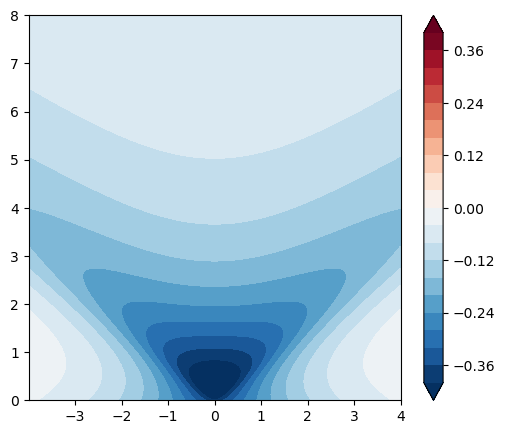

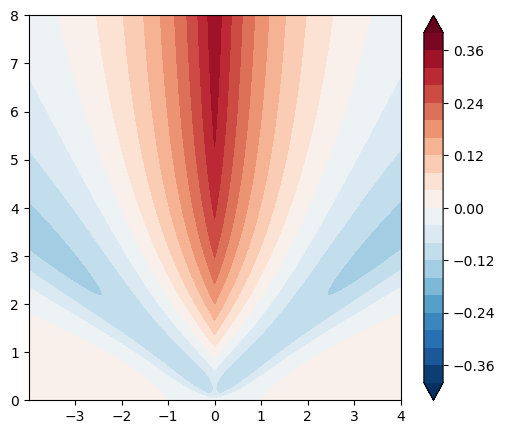

In [64]:
## Gemini's solution
from scipy.special import exp1 as e1

x = np.linspace(-4, 4, 201) + 1e-8
z = np.linspace(0, 8, 201)
X, Z = np.meshgrid(x, z)

f_omega = 0.7
alpha_omega = 0.1
N = 0.01
omega = 2 * np.pi / (24 * 3600)
N_omega = N / omega

Cz = (1j + alpha_omega) ** 2 + f_omega**2
Cx = 1 + 1 / N_omega**2 * (1j + alpha_omega) ** 2

gamma0 = np.sqrt(Cx / Cz)
k0 = np.sqrt(Cz / Cx)

# Ensure real(gamma0) and imag(k0) are positive, as specified by Gemini
if np.imag(k0) < 0:
    k0 = k0 * np.exp(1j * np.pi)
if np.real(gamma0) < 0:
    gamma0 = gamma0 * np.exp(1j * np.pi)

Zp = Z + 1j * k0 * X
Zm = Z - 1j * k0 * X

Hp = np.exp(Zp) * e1(Zp) - np.exp(-Zp) * e1(-Zp)
Hm = np.exp(Zm) * e1(Zm) - np.exp(-Zm) * e1(-Zm)

psi_tilde = np.zeros_like(X, dtype=complex)

psi_tilde += 1j * np.exp(-Z) / (2 * Cx * k0) * np.exp(1j * k0 * np.abs(X))
psi_tilde += -1 / (4 * np.pi * Cx * k0) * (Hm + Hp)

# Plot the function Hp
t = 2
kwargs = {"levels": np.linspace(-3, 3, 21), "cmap": "RdBu_r", "extend": "both"}
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
con = ax.contourf(X, Z, np.real((Hp + Hm) * np.exp(1j * t)), **kwargs)
plt.colorbar(con, extend="both")
fig.savefig("Hp.png", dpi=100)

# Plot Gemini's solution
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
kwargs["levels"] = np.linspace(-.4, .4, 21)
con = ax.contourf(X, Z, np.real(psi_tilde * np.exp(1j * t)), **kwargs)
plt.colorbar(con, extend="both")
fig.savefig("psi_tilde.png", dpi=100)

# Apply correction; still wrong
psi_tilde += -1j / (2 * Cx * k0) * np.exp(1j * k0 * np.abs(X))
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
kwargs["levels"] = np.linspace(-.4, .4, 21)
con = ax.contourf(X, Z, np.real(psi_tilde * np.exp(1j * t)), **kwargs)
plt.colorbar(con, extend="both")
fig.savefig("psi_tilde.png", dpi=100)